In [1]:
import pandas as pd
import numpy as np

In [9]:
nomes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')

In [4]:
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')

In [72]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [73]:
nomes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [74]:
medias = notas.groupby('movieId').mean()

In [75]:
medias.head()

,userId,rating,timestamp
movieId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08


In [76]:
medias = medias['rating']

In [77]:
medias

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [78]:
filmes = nomes.join(medias, on='movieId')

In [79]:
filmes.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [80]:
contador = notas.groupby('movieId').count()

In [81]:
contador.columns = ['userId', 'cont', 'timestamp']

In [82]:
contador

,userId,cont,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [83]:
contador = contador['cont']

In [84]:
contador

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: cont, Length: 9724, dtype: int64

In [85]:
filmes = filmes.join(contador, on='movieId')

In [86]:
filmes

,movieId,title,genres,rating,cont
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
9739,193585,Flint (2017),Drama,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0


In [87]:
import seaborn as sns

In [88]:
correlacao = filmes.corr()

In [89]:
correlacao

,movieId,rating,cont
movieId,1.000000,0.027841,-0.202335
rating,0.027841,1.000000,0.127259
cont,-0.202335,0.127259,1.000000


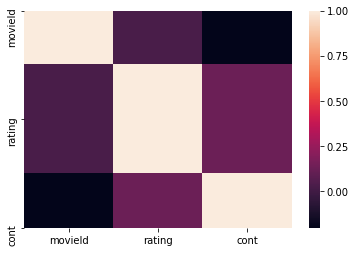

In [90]:
sns.heatmap(correlacao)

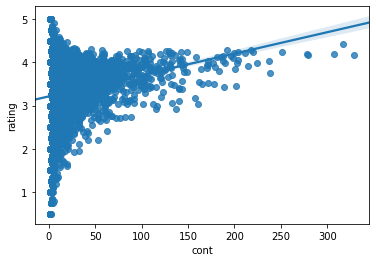

In [91]:
sns.regplot(filmes['cont'], filmes['rating'])

In [94]:
avgs = filmes['rating'].round(2)

In [95]:
filmes['average'] = pd.DataFrame(avgs)

In [99]:
filmes

,movieId,title,genres,rating,cont,average
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0,3.07
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0,3.50
9739,193585,Flint (2017),Drama,3.500000,1.0,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0,3.50


In [188]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 6 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
rating     9724 non-null float64
cont       9724 non-null float64
average    9724 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 456.8+ KB


# TRATANDO A COLUNA DOS GÊNEROS

In [128]:
generos = list(filmes['genres'])

In [165]:
novo = []
for x in generos:
    item = x
    for y in ['|']:
        item = item.replace(y, " ")
    novo.append(item)

In [166]:
novo

['Adventure Animation Children Comedy Fantasy',
 'Adventure Children Fantasy',
 'Comedy Romance',
 'Comedy Drama Romance',
 'Comedy',
 'Action Crime Thriller',
 'Comedy Romance',
 'Adventure Children',
 'Action',
 'Action Adventure Thriller',
 'Comedy Drama Romance',
 'Comedy Horror',
 'Adventure Animation Children',
 'Drama',
 'Action Adventure Romance',
 'Crime Drama',
 'Drama Romance',
 'Comedy',
 'Comedy',
 'Action Comedy Crime Drama Thriller',
 'Comedy Crime Thriller',
 'Crime Drama Horror Mystery Thriller',
 'Action Crime Thriller',
 'Drama Sci-Fi',
 'Drama Romance',
 'Drama',
 'Children Drama',
 'Drama Romance',
 'Adventure Drama Fantasy Mystery Sci-Fi',
 'Crime Drama',
 'Drama',
 'Mystery Sci-Fi Thriller',
 'Children Drama',
 'Crime Drama',
 'Children Comedy',
 'Comedy Romance',
 'Drama',
 'Drama War',
 'Action Crime Drama',
 'Drama',
 'Action Adventure Fantasy',
 'Comedy Drama Thriller',
 'Drama Romance',
 'Mystery Thriller',
 'Animation Children Drama Musical Romance',
 'Dram

In [167]:
for i, frase in enumerate(novo):
    novo[i] = frase[:].split()

In [168]:
novo

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Comedy'],
 ['Comedy'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Action', 'Crime', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Children', 'Drama'],
 ['Drama', 'Romance'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Crime', 'Drama'],
 ['Drama'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Children', 'Drama'],
 ['Crime', 'Drama'],
 ['Children', 'Comedy'],
 

In [170]:
teste = []
for k, v in enumerate(novo):
    for i in v:
        teste.append(i)

In [171]:
teste

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Adventure',
 'Children',
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 'Children',
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Adventure',
 'Animation',
 'Children',
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Crime',
 'Drama',
 'Drama',
 'Romance',
 'Comedy',
 'Comedy',
 'Action',
 'Comedy',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Crime',
 'Thriller',
 'Crime',
 'Drama',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Children',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Drama',
 'Fantasy',
 'Mystery',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'Children',
 'Drama',
 'Crime',
 'Drama',
 'Children',
 'Comedy',
 'Comedy',
 'Romance'

In [172]:
teste = np.array(teste)

In [173]:
teste

array(['Adventure', 'Animation', 'Children', ..., 'Action', 'Animation',
       'Comedy'], dtype='<U11')

In [132]:
pip install collections

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [133]:
import collections

# CONTANDO O NÚMERO DE GÊNEROS DO DATASET

In [174]:
counter = collections.Counter(teste)

In [175]:
counter

Counter({'Adventure': 1263,
         'Animation': 611,
         'Children': 664,
         'Comedy': 3756,
         'Fantasy': 779,
         'Romance': 1596,
         'Drama': 4361,
         'Action': 1828,
         'Crime': 1199,
         'Thriller': 1894,
         'Horror': 978,
         'Mystery': 573,
         'Sci-Fi': 980,
         'War': 382,
         'Musical': 334,
         'Documentary': 440,
         'IMAX': 158,
         'Western': 167,
         'Film-Noir': 87,
         '(no': 34,
         'genres': 34,
         'listed)': 34})

In [182]:
gen = []
valor = []
for k, v in counter.most_common(n=19):
    gen.append(k)
    valor.append(v)

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 19 artists>

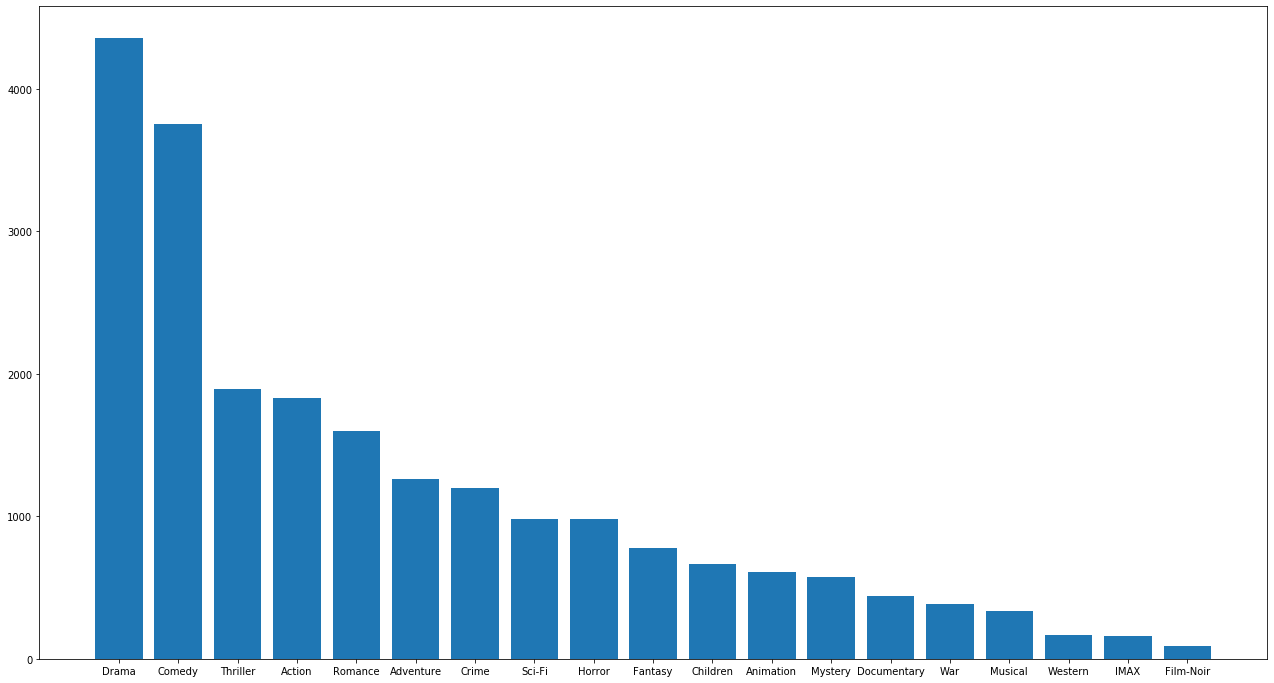

In [187]:
plt.figure(figsize=(22,12))
plt.bar(gen, valor)